In [111]:
using CSV, Statistics, Plots

In [39]:
df_X = CSV.read("boston_X.csv", delim=",", header=false)
df_y = CSV.read("boston_y.csv", delim=",", header=false)
X = convert(Matrix{Float64}, df_X);
y = convert(Matrix{Float64}, df_y);


In [40]:
size(X), size(y)

((506, 13), (506, 1))

In [80]:
std_agg(cnt, s1, s2) = sqrt((s2/cnt) - (s1/cnt)^2)
rmse(pred, truth) = sqrt(mean((pred .- truth).^2))

rmse (generic function with 1 method)

In [68]:
y .- mean(y)

506×1 Array{Float64,2}:
   1.4671936758893267
  -0.9328063241106719
  12.16719367588933
  10.867193675889325
  13.66719367588933
   6.167193675889326
   0.3671936758893253
   4.567193675889328
  -6.032806324110673
  -3.6328063241106747
  -7.532806324110673
  -3.6328063241106747
  -0.832806324110674
   ⋮
   1.9671936758893267
   0.5671936758893281
  -2.832806324110674
  -4.232806324110673
  -1.332806324110674
  -5.032806324110673
  -5.732806324110673
  -0.13280632411067472
  -1.9328063241106719
   1.3671936758893253
  -0.5328063241106733
 -10.632806324110673

In [74]:
root_val = mean(y)


rmse (generic function with 1 method)

In [79]:
rmse(y.+2, y)

2.0

In [96]:
X

506×13 Array{Float64,2}:
 0.00632  18.0   2.31  0.0  0.538  6.575  …  1.0  296.0  15.3  396.9    4.98
 0.02731   0.0   7.07  0.0  0.469  6.421     2.0  242.0  17.8  396.9    9.14
 0.02729   0.0   7.07  0.0  0.469  7.185     2.0  242.0  17.8  392.83   4.03
 0.03237   0.0   2.18  0.0  0.458  6.998     3.0  222.0  18.7  394.63   2.94
 0.06905   0.0   2.18  0.0  0.458  7.147     3.0  222.0  18.7  396.9    5.33
 0.02985   0.0   2.18  0.0  0.458  6.43   …  3.0  222.0  18.7  394.12   5.21
 0.08829  12.5   7.87  0.0  0.524  6.012     5.0  311.0  15.2  395.6   12.43
 0.14455  12.5   7.87  0.0  0.524  6.172     5.0  311.0  15.2  396.9   19.15
 0.21124  12.5   7.87  0.0  0.524  5.631     5.0  311.0  15.2  386.63  29.93
 0.17004  12.5   7.87  0.0  0.524  6.004     5.0  311.0  15.2  386.71  17.1
 0.22489  12.5   7.87  0.0  0.524  6.377  …  5.0  311.0  15.2  392.52  20.45
 0.11747  12.5   7.87  0.0  0.524  6.009     5.0  311.0  15.2  396.9   13.27
 0.09378  12.5   7.87  0.0  0.524  5.889     5.0  31

In [109]:
# for a given column, we are going to look for a split

num_samples = length(y)
num_cols = size(X, 2)

x = X[:, 1]


best_score = Inf
best_split = 0
lhs_idx = []
rhs_idx = []
split_col = 0


for col in 1:2
    println(col)
    # try each split, moving an item from right to left
    x = X[:, col]

    # sort the x's
    sort_idx = sortperm(x)
    sorted_x = x[sort_idx]
    sorted_y = y[sort_idx]
    
    # put everything in the right
    rhs_cnt, rhs_sum, rhs_sum2 = num_samples, sum(y), sum(y.^2)
    lhs_cnt, lhs_sum, lhs_sum2 = 0, 0.0, 0.0
    
    for i in 1:(num_samples - 1)
        x_i, y_i = sorted_x[i], sorted_y[i]
        lhs_cnt += 1
        rhs_cnt -= 1
        lhs_sum += y_i
        rhs_sum -= y_i
        lhs_sum2 += y_i^2
        rhs_sum2 -= y_i^2
    
        lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
        rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
    
        curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
        
        if curr_score < best_score
            split_col = col
            best_score = curr_score
            best_split = x_i
            lhs_idx = findall(<=(best_split), x)
            rhs_idx = findall(>(best_split), x)
        end
    end
end



1
2


DomainError: DomainError with -5.502442945726216e-11:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [110]:
split_col, best_score, best_split

(1, 4167.223505074033, 6.65492)

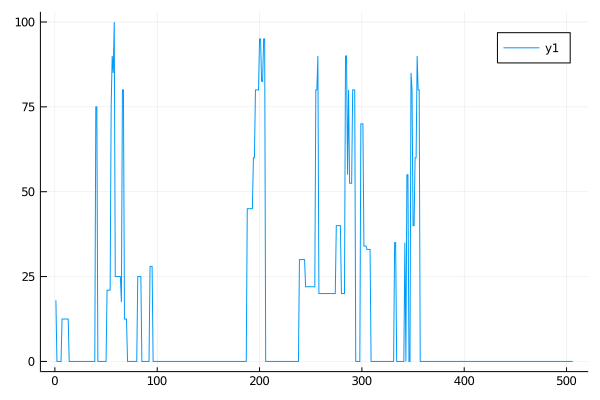

In [112]:
plot(X[:, 2])

In [24]:
?CSV.File

```
CSV.File(source; kwargs...) => CSV.File
```

Read a UTF-8 CSV input (a filename given as a String or FilePaths.jl type, or any other IO source), returning a `CSV.File` object.

Opens the file and uses passed arguments to detect the number of columns and column types, unless column types are provided manually via the `types` keyword argument. Note that passing column types manually can increase performance and reduce the memory use for each column type provided (column types can be given as a `Vector` for all columns, or specified per column via name or index in a `Dict`). For text encodings other than UTF-8, see the [StringEncodings.jl](https://github.com/JuliaStrings/StringEncodings.jl) package for re-encoding a file or IO stream. The returned `CSV.File` object supports the [Tables.jl](https://github.com/JuliaData/Tables.jl) interface and can iterate `CSV.Row`s. `CSV.Row` supports `propertynames` and `getproperty` to access individual row values. `CSV.File` also supports entire column access like a `DataFrame` via direct property access on the file object, like `f = CSV.File(file); f.col1`. Note that duplicate column names will be detected and adjusted to ensure uniqueness (duplicate column name `a` will become `a_1`). For example, one could iterate over a csv file with column names `a`, `b`, and `c` by doing:

```julia
for row in CSV.File(file)
    println("a=$(row.a), b=$(row.b), c=$(row.c)")
end
```

By supporting the Tables.jl interface, a `CSV.File` can also be a table input to any other table sink function. Like:

```julia
# materialize a csv file as a DataFrame, without copying columns from CSV.File; these columns are read-only
df = CSV.File(file) |> DataFrame!

# load a csv file directly into an sqlite database table
db = SQLite.DB()
tbl = CSV.File(file) |> SQLite.load!(db, "sqlite_table")
```

Supported keyword arguments include:

  * File layout options:

      * `header=1`: the `header` argument can be an `Int`, indicating the row to parse for column names; or a `Range`, indicating a span of rows to be concatenated together as column names; or an entire `Vector{Symbol}` or `Vector{String}` to use as column names; if a file doesn't have column names, either provide them as a `Vector`, or set `header=0` or `header=false` and column names will be auto-generated (`Column1`, `Column2`, etc.)
      * `normalizenames=false`: whether column names should be "normalized" into valid Julia identifier symbols; useful when iterating rows and accessing column values of a row via `getproperty` (e.g. `row.col1`)
      * `datarow`: an `Int` argument to specify the row where the data starts in the csv file; by default, the next row after the `header` row is used. If `header=0`, then the 1st row is assumed to be the start of data
      * `skipto::Int`: similar to `datarow`, specifies the number of rows to skip before starting to read data
      * `footerskip::Int`: number of rows at the end of a file to skip parsing
      * `limit`: an `Int` to indicate a limited number of rows to parse in a csv file; use in combination with `skipto` to read a specific, contiguous chunk within a file
      * `transpose::Bool`: read a csv file "transposed", i.e. each column is parsed as a row
      * `comment`: rows that begin with this `String` will be skipped while parsing
      * `use_mmap::Bool=!Sys.iswindows()`: whether the file should be mmapped for reading, which in some cases can be faster
      * `ignoreemptylines::Bool=false`: whether empty rows/lines in a file should be ignored (if `false`, each column will be assigned `missing` for that empty row)
      * `threaded::Bool`: whether parsing should utilize multiple threads; by default threads are used on large enough files, but isn't allowed when `transpose=true` or when `limit` is used; only available in Julia 1.3+
      * `select`: an `AbstractVector` of `Int`, `Symbol`, `String`, or `Bool`, or a "selector" function of the form `(i, name) -> keep::Bool`; only columns in the collection or for which the selector function returns `true` will be parsed and accessible in the resulting `CSV.File`. Invalid values in `select` are ignored.
      * `drop`: inverse of `select`; an `AbstractVector` of `Int`, `Symbol`, `String`, or `Bool`, or a "drop" function of the form `(i, name) -> drop::Bool`; columns in the collection or for which the drop function returns `true` will ignored in the resulting `CSV.File`. Invalid values in `drop` are ignored.
  * Parsing options:

      * `missingstrings`, `missingstring`: either a `String`, or `Vector{String}` to use as sentinel values that will be parsed as `missing`; by default, only an empty field (two consecutive delimiters) is considered `missing`
      * `delim=','`: a `Char` or `String` that indicates how columns are delimited in a file; if no argument is provided, parsing will try to detect the most consistent delimiter on the first 10 rows of the file
      * `ignorerepeated::Bool=false`: whether repeated (consecutive) delimiters should be ignored while parsing; useful for fixed-width files with delimiter padding between cells
      * `quotechar='"'`, `openquotechar`, `closequotechar`: a `Char` (or different start and end characters) that indicate a quoted field which may contain textual delimiters or newline characters
      * `escapechar='"'`: the `Char` used to escape quote characters in a quoted field
      * `dateformat::Union{String, Dates.DateFormat, Nothing}`: a date format string to indicate how Date/DateTime columns are formatted for the entire file
      * `decimal='.'`: a `Char` indicating how decimals are separated in floats, i.e. `3.14` used '.', or `3,14` uses a comma ','
      * `truestrings`, `falsestrings`: `Vectors of Strings` that indicate how `true` or `false` values are represented; by default only `true` and `false` are treated as `Bool`
  * Column Type Options:

      * `type`: a single type to use for parsing an entire file; i.e. all columns will be treated as the same type; useful for matrix-like data files
      * `types`: a Vector or Dict of types to be used for column types; a Dict can map column index `Int`, or name `Symbol` or `String` to type for a column, i.e. Dict(1=>Float64) will set the first column as a Float64, Dict(:column1=>Float64) will set the column named column1 to Float64 and, Dict("column1"=>Float64) will set the column1 to Float64; if a `Vector` if provided, it must match the # of columns provided or detected in `header`
      * `typemap::Dict{Type, Type}`: a mapping of a type that should be replaced in every instance with another type, i.e. `Dict(Float64=>String)` would change every detected `Float64` column to be parsed as `String`
      * `pool::Union{Bool, Float64}=0.1`: if `true`, *all* columns detected as `String` will be internally pooled; alternatively, the proportion of unique values below which `String` columns should be pooled (by default 0.1, meaning that if the # of unique strings in a column is under 10%, it will be pooled)
      * `categorical::Bool=false`: whether pooled columns should be copied as CategoricalArray instead of PooledArray; note that in `CSV.read`, by default, columns are not copied, so pooled columns will have type `CSV.Column{String, PooledString}`; to get `CategoricalArray` columns, also pass `copycols=true`
      * `strict::Bool=false`: whether invalid values should throw a parsing error or be replaced with `missing`
      * `silencewarnings::Bool=false`: if `strict=false`, whether invalid value warnings should be silenced
